In [2]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings(action='ignore')

### 1.
어느공장에서 생산하는 부품에 대하여 무게를 측정하여 다음과 같은자료를 얻었다. 평균, 중앙값, 표준편차,왜도,첨도를 구하는 프로그램을 작성하여 값들을 구하시오.
 
    10.21	10.53	9.99	11.11	10.47	10.48	10.25	10.63	11.07	10.61
    10.33	10.01	11.20	10.41	10.33	10.12	10.78	10.91	10.37	9.58

In [3]:
a = [10.21,10.53,9.99,11.11,10.47,10.48,10.25,10.63,11.07,10.61,10.33,10.01,11.20,10.41,10.33,10.12,10.78,10.91,10.37,9.58]
dsw = pd.DataFrame(a,columns = ['weight'] ) 

In [4]:
dsw.head()

,weight
0,10.21
1,10.53
2,9.99
3,11.11
4,10.47


In [5]:
dsw.weight.describe()

count    20.000000
mean     10.469500
std       0.408237
min       9.580000
25%      10.240000
50%      10.440000
75%      10.667500
max      11.200000
Name: weight, dtype: float64

왜도 (Skewness)
- 분포의 비대칭도.

- 정규분포 = 왜도 0

- 왼쪽으로 치우침 = 왜도 > 0

- 오른쪽으로 치우침 = 왜도 < 0

In [6]:
from scipy.stats import skew
# 왜도  : 분포의 비대칭한 정도 왜도 0 이면 정규분포 
skew(dsw.weight)

0.002573709859693571

첨도 (Kurtosis)
- 확률분포의 뾰족한 정도.

- 정규분포 = 첨도 0(Pearson 첨도 = 3)

- 위로 뾰족함 = 첨도 > 0(Pearson 첨도 >3)

- 아래로 뾰족함 = 첨도 < 0 (Pearson 첨도 < 3)


In [7]:
from scipy.stats import kurtosis
# 첨도
kurtosis(dsw.weight, fisher=True)

-0.25292022513764234


* Fisher = True 

   - 첨도 기준이 Fisher (normal ==> 0.0) 이다.

   - 정규분포의 첨도 = 0이다. 

 

* Fisher = False

   - 첨도 기준이 Pearson (normal ==> 3.0)

   - 정규분포의 첨도 = 3이다.



## 2.
다음은 어느대학에서 개설된 교양 통계학 강좌를 수강한 학생들의 학년별 성적자료이다. 
성적의 변수명은 score, 학년의 변수명은 level (L=1학년, H=2,3,4학년)로 지정하여 다음 문제를 해결하시오 

    1학년: 88,67,77,75,84,90,95,73,69,80,79,82,95,62
    2학년: 82,86,88,92,77,72,96,75,68,96,85,86,76,89,83


학년별 성적자료에 대한 기술통계량을 산출하시오.

In [8]:
first = [88,67,77,75,84,90,95,73,69,80,79,82,95,62]
dssf = pd.DataFrame(first,columns = ['score'] )
dssf.describe()

,score
count,14.000000
mean,79.714286
std,10.117985
min,62.000000
25%,73.500000
50%,79.500000
75%,87.000000
max,95.000000


In [21]:
second = [82,86,88,92,77,72,96,75,68,96,85,86,76,89,83]
dsss = pd.DataFrame(second,columns = ['scoref'] )
dsss.describe()

,scoref
count,15.000000
mean,83.400000
std,8.432929
min,68.000000
25%,76.500000
50%,85.000000
75%,88.500000
max,96.000000


학년 각각의 히스토그램과 상자그림을 작성하시오.

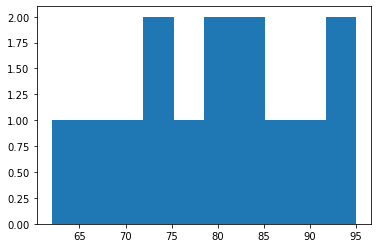

In [22]:
#히스토 그램
#first grade histogam shown
import matplotlib.pyplot as plt
plt.hist(first)
plt.show()

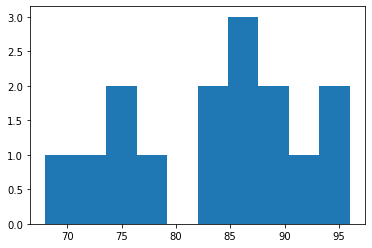

In [23]:
#second grade histogram show n
plt.hist(dsss)
plt.show()

In [ ]:
dssall = pd.concat([dssf,dsss],axis=1)
dssall

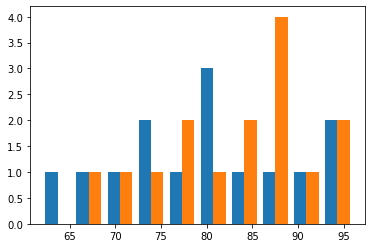

In [25]:
plt.hist(dssall)
plt.show()

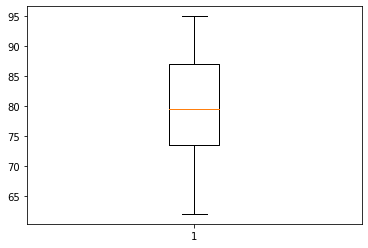

In [29]:
#상자 그림 이상치 확인
#first grade
plt.boxplot(dssf)
plt.show()

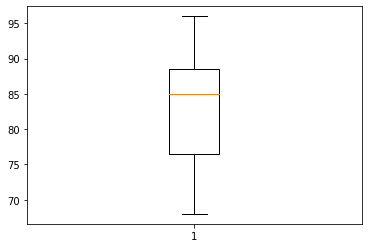

In [30]:
plt.boxplot(dsss)
plt.show()

3) 위의 자료가 정규분포를 따른다고 할수 있는지 설명하시오.  

먼저 1학년의 자료와 2~ 4학년의 자료의 점규성 검정을 한다고 하면,

1학년과 2~4학년의 자료의 수가 각각 100 개를 넘지 못하는 소표본 이다.

자료가 정규 분포를 따른 다는 귀무 가설을 가정하자. Shapiro-Wilk normality test 와 Anderson-Darling 정규성 검정법을 사용한다.

In [37]:
from scipy import stats
#1 학년 자료 shapiro-wilk 파악
shapiro_test_1 = stats.shapiro(first)
#2~4학년 자료 p-value 파악
shapiro_test_2 = stats.shapiro(second)

In [38]:
print(shapiro_test_1,shapiro_test_2)

ShapiroResult(statistic=0.9732428193092346, pvalue=0.9167655110359192) ShapiroResult(statistic=0.9658416509628296, pvalue=0.7924318313598633)


In [33]:
alldata =first + second
len(alldata)

29

In [36]:
shapiro_test = stats.shapiro(alldata)
shapiro_test

ShapiroResult(statistic=0.9720022678375244, pvalue=0.6151293516159058)

1학년 자료의 p-value 는 0.916 이며, 2~4 학년의 p-value 는 0.792이다. ,모든 학년의 p-value 는 0.615이다

자료 모두 통계랑(W)과 p 값인(p-value) 유의 확률이 모두 0.05 보다 크다.

 p 값인(p-value) 유의 확률이 모두 0.05 보다 크다.

그렇므로 검정통계량으로 확인한 바에 따라 귀무 가설을 채택한다.

따라서 자료 모두 정규성을 따르며 정규분포를 따른다.


In [40]:
result =stats.anderson(alldata)
print('Statistic: %.3f' % result.statistic)

Statistic: 0.195


In [42]:
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

15.000: 0.520, data looks normal (fail to reject H0)
10.000: 0.592, data looks normal (fail to reject H0)
5.000: 0.710, data looks normal (fail to reject H0)
2.500: 0.828, data looks normal (fail to reject H0)
1.000: 0.985, data looks normal (fail to reject H0)


다음은 점들이 직선에 유사할때 정규성을 보이는지 확인하는 QQ plot 이다.

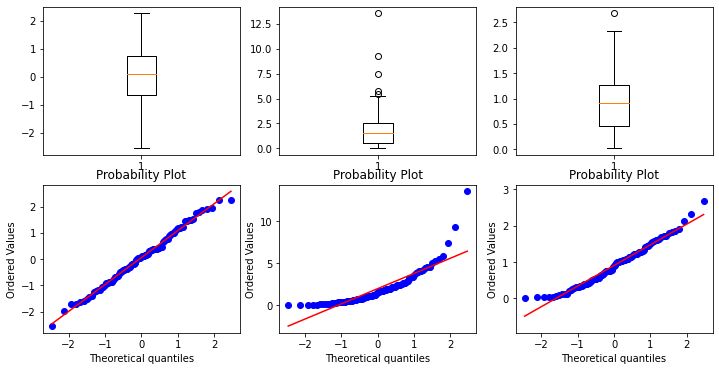

In [49]:
#example
np.random.seed(0)

n = 100
x1 = np.random.normal(0, 1, n)
x2 = np.random.exponential(2, n)
x3 = np.log1p(x2)

f, axes = plt.subplots(2, 3, figsize=(12, 6))
axes[0][0].boxplot(x1)
stats.probplot(x1, plot=axes[1][0]) #scipy.stats.probplot
axes[0][1].boxplot(x2)
stats.probplot(x2, plot=axes[1][1]) #scipy.stats.probplot
axes[0][2].boxplot(x3)
stats.probplot(x3, plot=axes[1][2]) #scipy.stats.probplot
plt.axis("equal")
plt.show()

((array([-1.9841736 , -1.57788426, -1.33248614, -1.14838713, -0.99668573,
         -0.86502445, -0.74688387, -0.63835602, -0.53688038, -0.44066086,
         -0.34836401, -0.25894831, -0.17156005, -0.08546501,  0.        ,
          0.08546501,  0.17156005,  0.25894831,  0.34836401,  0.44066086,
          0.53688038,  0.63835602,  0.74688387,  0.86502445,  0.99668573,
          1.14838713,  1.33248614,  1.57788426,  1.9841736 ]),
  array([62, 67, 68, 69, 72, 73, 75, 75, 76, 77, 77, 79, 80, 82, 82, 83, 84,
         85, 86, 86, 88, 88, 89, 90, 92, 95, 95, 96, 96])),
 (9.598332464914407, 81.62068965517241, 0.9914309763877579))

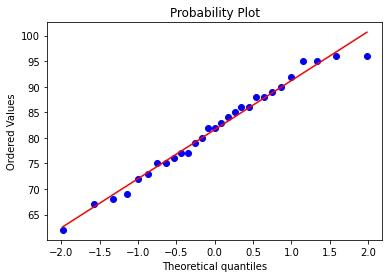

In [50]:
# students of all
stats.probplot(alldata,plot=plt)

Central limit theorem

* 평균과 분산이 같은 여러 개의 독립변수(X1…Xn)가 있을 때
* 이 독립변수의 합으로 만든 새로운 독립변수를 Xsum이라고 하고,
* Xsum의 분포를 norm(0, 1)을 따르도록 표준화시켜주었을 때(이건 생략도 가능합니다)
* Xsum은 n이 커질수록 가우시안분포를 따른다는 것

학년별 평균, 표준편차, 최대값, 최소값을 구하시오.  -> 상단에 descibe() check

## 3.
어느 대기업에서는 특정 중소기업으로부터 부품을 납품받고 있다. 이 부품의 납품서에 의하면 부품의 평균 지름은 12.5cm 라고 한다. 이 대기업에서는 부품의 지름이 실제로 납품서에 적혀 있는 값과 동일한 지를 검사하기 위해서 30개의 부품을 임으로 추출하여 지름을 측정한 결과, 다음과 같은 결과를 얻었다.

    12.5  12.6  12.5  12.4  12.6    12.8    12.3  12.6  12.4    12.5
    12.8  12.5  12.4    12.6  12.7  12.5    12.4  12.5  12.3    12.6
    12.6  12.4  12.7  12.5  12.5    12.6    12.5  12.7  12.4    12.6


부품의 평균지름이 납품서와 같다고 할 수 있는지를 유의수준 5%에서 검정하시오.

30 개의 자료를 가진 표본이므로 정규성을 먼저 검사한다. Shapiro-Wilk normality test를 사용하며 자료가 정규성을 가진다는 귀무 가설을 가정한다

In [53]:
diameter =[12.5,12.6,12.5,12.4,12.6,12.8,	12.3,	12.6,	12.4,12.5,12.8,	12.5,	12.4,	12.6,12.7,12.5,	12.4,	12.5,	12.3,	12.6,12.6,	12.4,	12.7,12.5,12.5,12.6,	12.5,	12.7,	12.4,	12.6]

In [60]:
dsdia=pd.DataFrame(diameter,columns=['diameter'])

In [62]:
#shapiro_wilk
shapiro_test_dia = stats.shapiro(dsdia.diameter)
shapiro_test_dia

ShapiroResult(statistic=0.9408271312713623, pvalue=0.09574711322784424)

p-value 가 0.05 를 넘으므로 귀무가설을 기각하지 못한다

위자료가 정규성을 가진다는 사실을 알았으니 유의수준 5%에서 T-검정을 한다. 먼저 다음과 같은 가설을 세운다.

귀무 가설 : 부품의 납품서에 의한 부품지름과 30개를 임의 추출한 지름의 평균(12.5cm)이 같다

H(0): μ = 12.5

In [63]:
#one sample ttest
#scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided')
onesam_test_dia = stats.ttest_1samp(dsdia.diameter,popmean=12.5,)
onesam_test_dia

Ttest_1sampResult(statistic=1.4093620435726293, pvalue=0.16936210287100165)

95 percent confidence interval: <- 95% 신뢰 구간 안에 귀무가설의 값 12.5 를 포함한다.

그렇므로 귀무가설을 기각하지 않고, 체택한다.

그렇므로 결론:

부품의 평균지름이 납품서와 같다